#Carga y Exploración Inicial de Datos


In [11]:
# @title
# Descargar el dataset directamente desde el repositorio UCI
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00310/UJIndoorLoc.zip
# Descomprimirlo
!unzip UJIndoorLoc.zip
# Cambiar el nombre si es necesario o verificar que el archivo está ahí
import pandas as pd
# Agregamos el nombr   la carpeta a la ruta
train_df = pd.read_csv('UJIndoorLoc/trainingData.csv')

print("¡Cargado con éxito!")
print(f"Dimensiones: {train_df.shape}")
print(train_df.head())


--2026-02-13 19:16:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/00310/UJIndoorLoc.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘UJIndoorLoc.zip.1’

UJIndoorLoc.zip.1       [   <=>              ]   1.40M  2.92MB/s    in 0.5s    

2026-02-13 19:16:01 (2.92 MB/s) - ‘UJIndoorLoc.zip.1’ saved [1463759]

Archive:  UJIndoorLoc.zip
replace UJIndoorLoc/trainingData.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: UJIndoorLoc/trainingData.csv  
replace UJIndoorLoc/validationData.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: UJIndoorLoc/validationData.csv  
¡Cargado con éxito!
Dimensiones: (19937, 529)
   WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0     100     100     100     100     100     100     100     100     100   
1     100 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

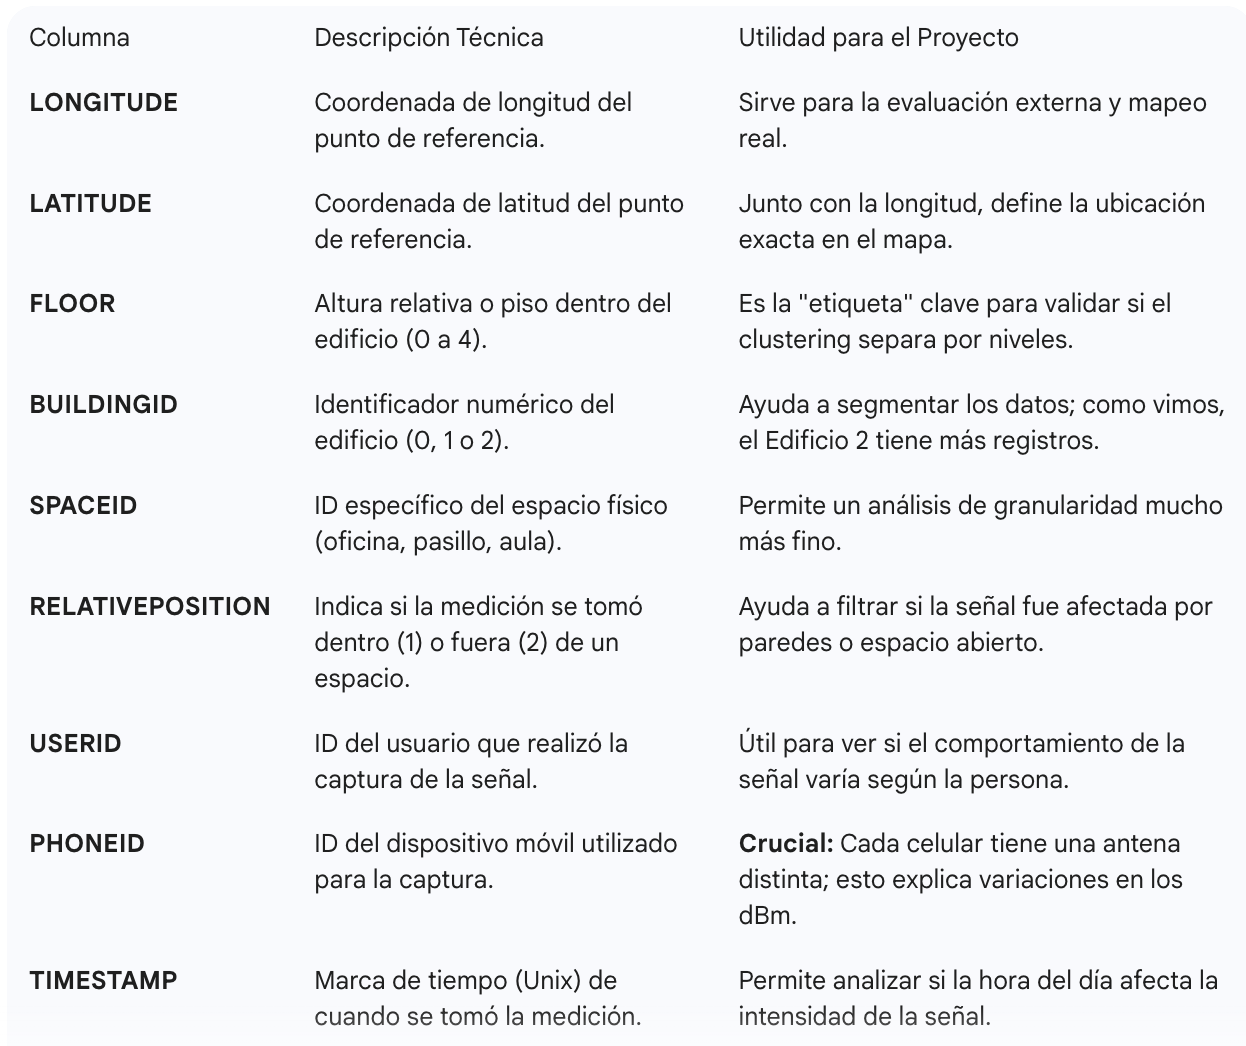

# Limpieza de Señales (Preprocesamiento de RSSI)


1. Dividir el dataset
2. Remplazo del valor 100 por -110
3. Normalizacion de 0-1
4. Concatenizar las partes




In [13]:
# @title
waps = train_df.iloc[:, 0:520]
etiquetas = train_df.iloc[:, 520:]
waps_limpios = waps.replace(100, -110)
waps_norm = (waps_limpios - (-110)) / (0 - (-110))


df_final = pd.concat([waps_norm, etiquetas], axis=1)
print(df_final.head())

   WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007    WAP008  WAP009  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  0.000000     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0  0.000000     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0  0.118182     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0  0.000000     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0  0.000000     0.0   

   WAP010  ...  WAP520  LONGITUDE      LATITUDE  FLOOR  BUILDINGID  SPACEID  \
0     0.0  ...     0.0 -7541.2643  4.864921e+06      2           1      106   
1     0.0  ...     0.0 -7536.6212  4.864934e+06      2           1      106   
2     0.0  ...     0.0 -7519.1524  4.864950e+06      2           1      103   
3     0.0  ...     0.0 -7524.5704  4.864934e+06      2           1      102   
4     0.0  ...     0.0 -7632.1436  4.864982e+06      0           0      122   

   RELATIVEPOSITION  USERID  PHONEID   TIMESTAMP  

# Edificio con mayor concurrencia

/tmp/ipython-input-1248413718.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BUILDINGID', data=df_final, palette='viridis')


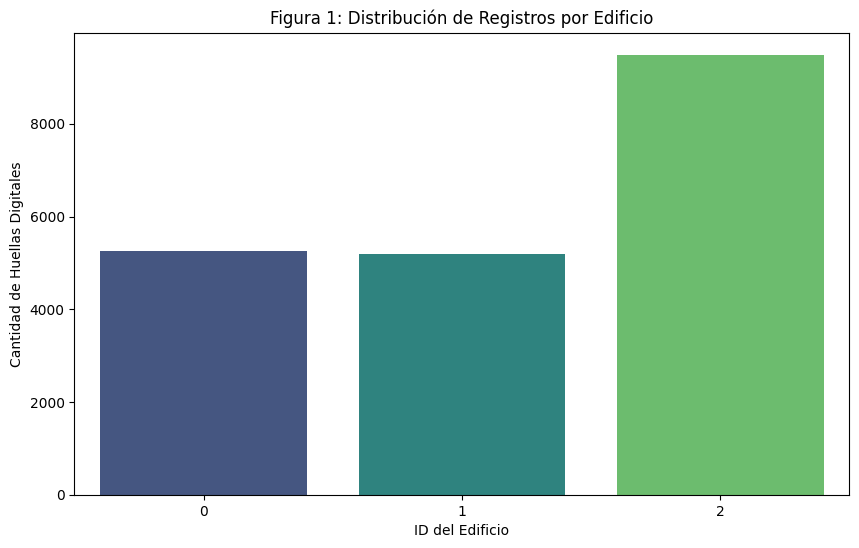

In [14]:
# @title

plt.figure(figsize=(10,6))
sns.countplot(x='BUILDINGID', data=df_final, palette='viridis')
plt.title('Figura 1: Distribución de Registros por Edificio')
plt.xlabel('ID del Edificio')
plt.ylabel('Cantidad de Huellas Digitales')
plt.show()


# EDA

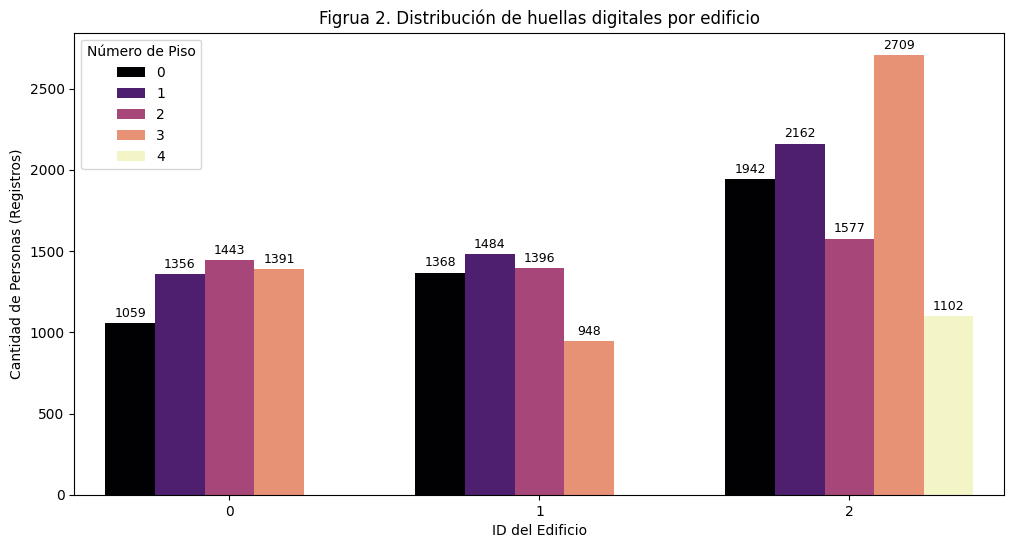

Resumen de valores nulos:
0


In [15]:
# @title
plt.figure(figsize=(12, 6))

# x='BUILDINGID' pone los edificios en el eje X
# hue='FLOOR' separa las barras por cada piso dentro del edificio
ax = sns.countplot(x='BUILDINGID', hue='FLOOR', data=df_final, palette='magma')

# Etiquetas profesionales
plt.title('Figrua 2. Distribución de huellas digitales por edificio')
plt.xlabel('ID del Edificio')
plt.ylabel('Cantidad de Personas (Registros)')
plt.legend(title='Número de Piso', loc='upper left')

# Opcional: poner el número exacto sobre cada barra para el reporte
for p in ax.patches:
    if p.get_height() > 0: # Solo poner etiqueta si hay datos
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 7),
                    textcoords='offset points')

plt.show()
# 4. Verificación de nulos (Importante para el reporte)
print("Resumen de valores nulos:")
print(df_final.isnull().sum().sum())

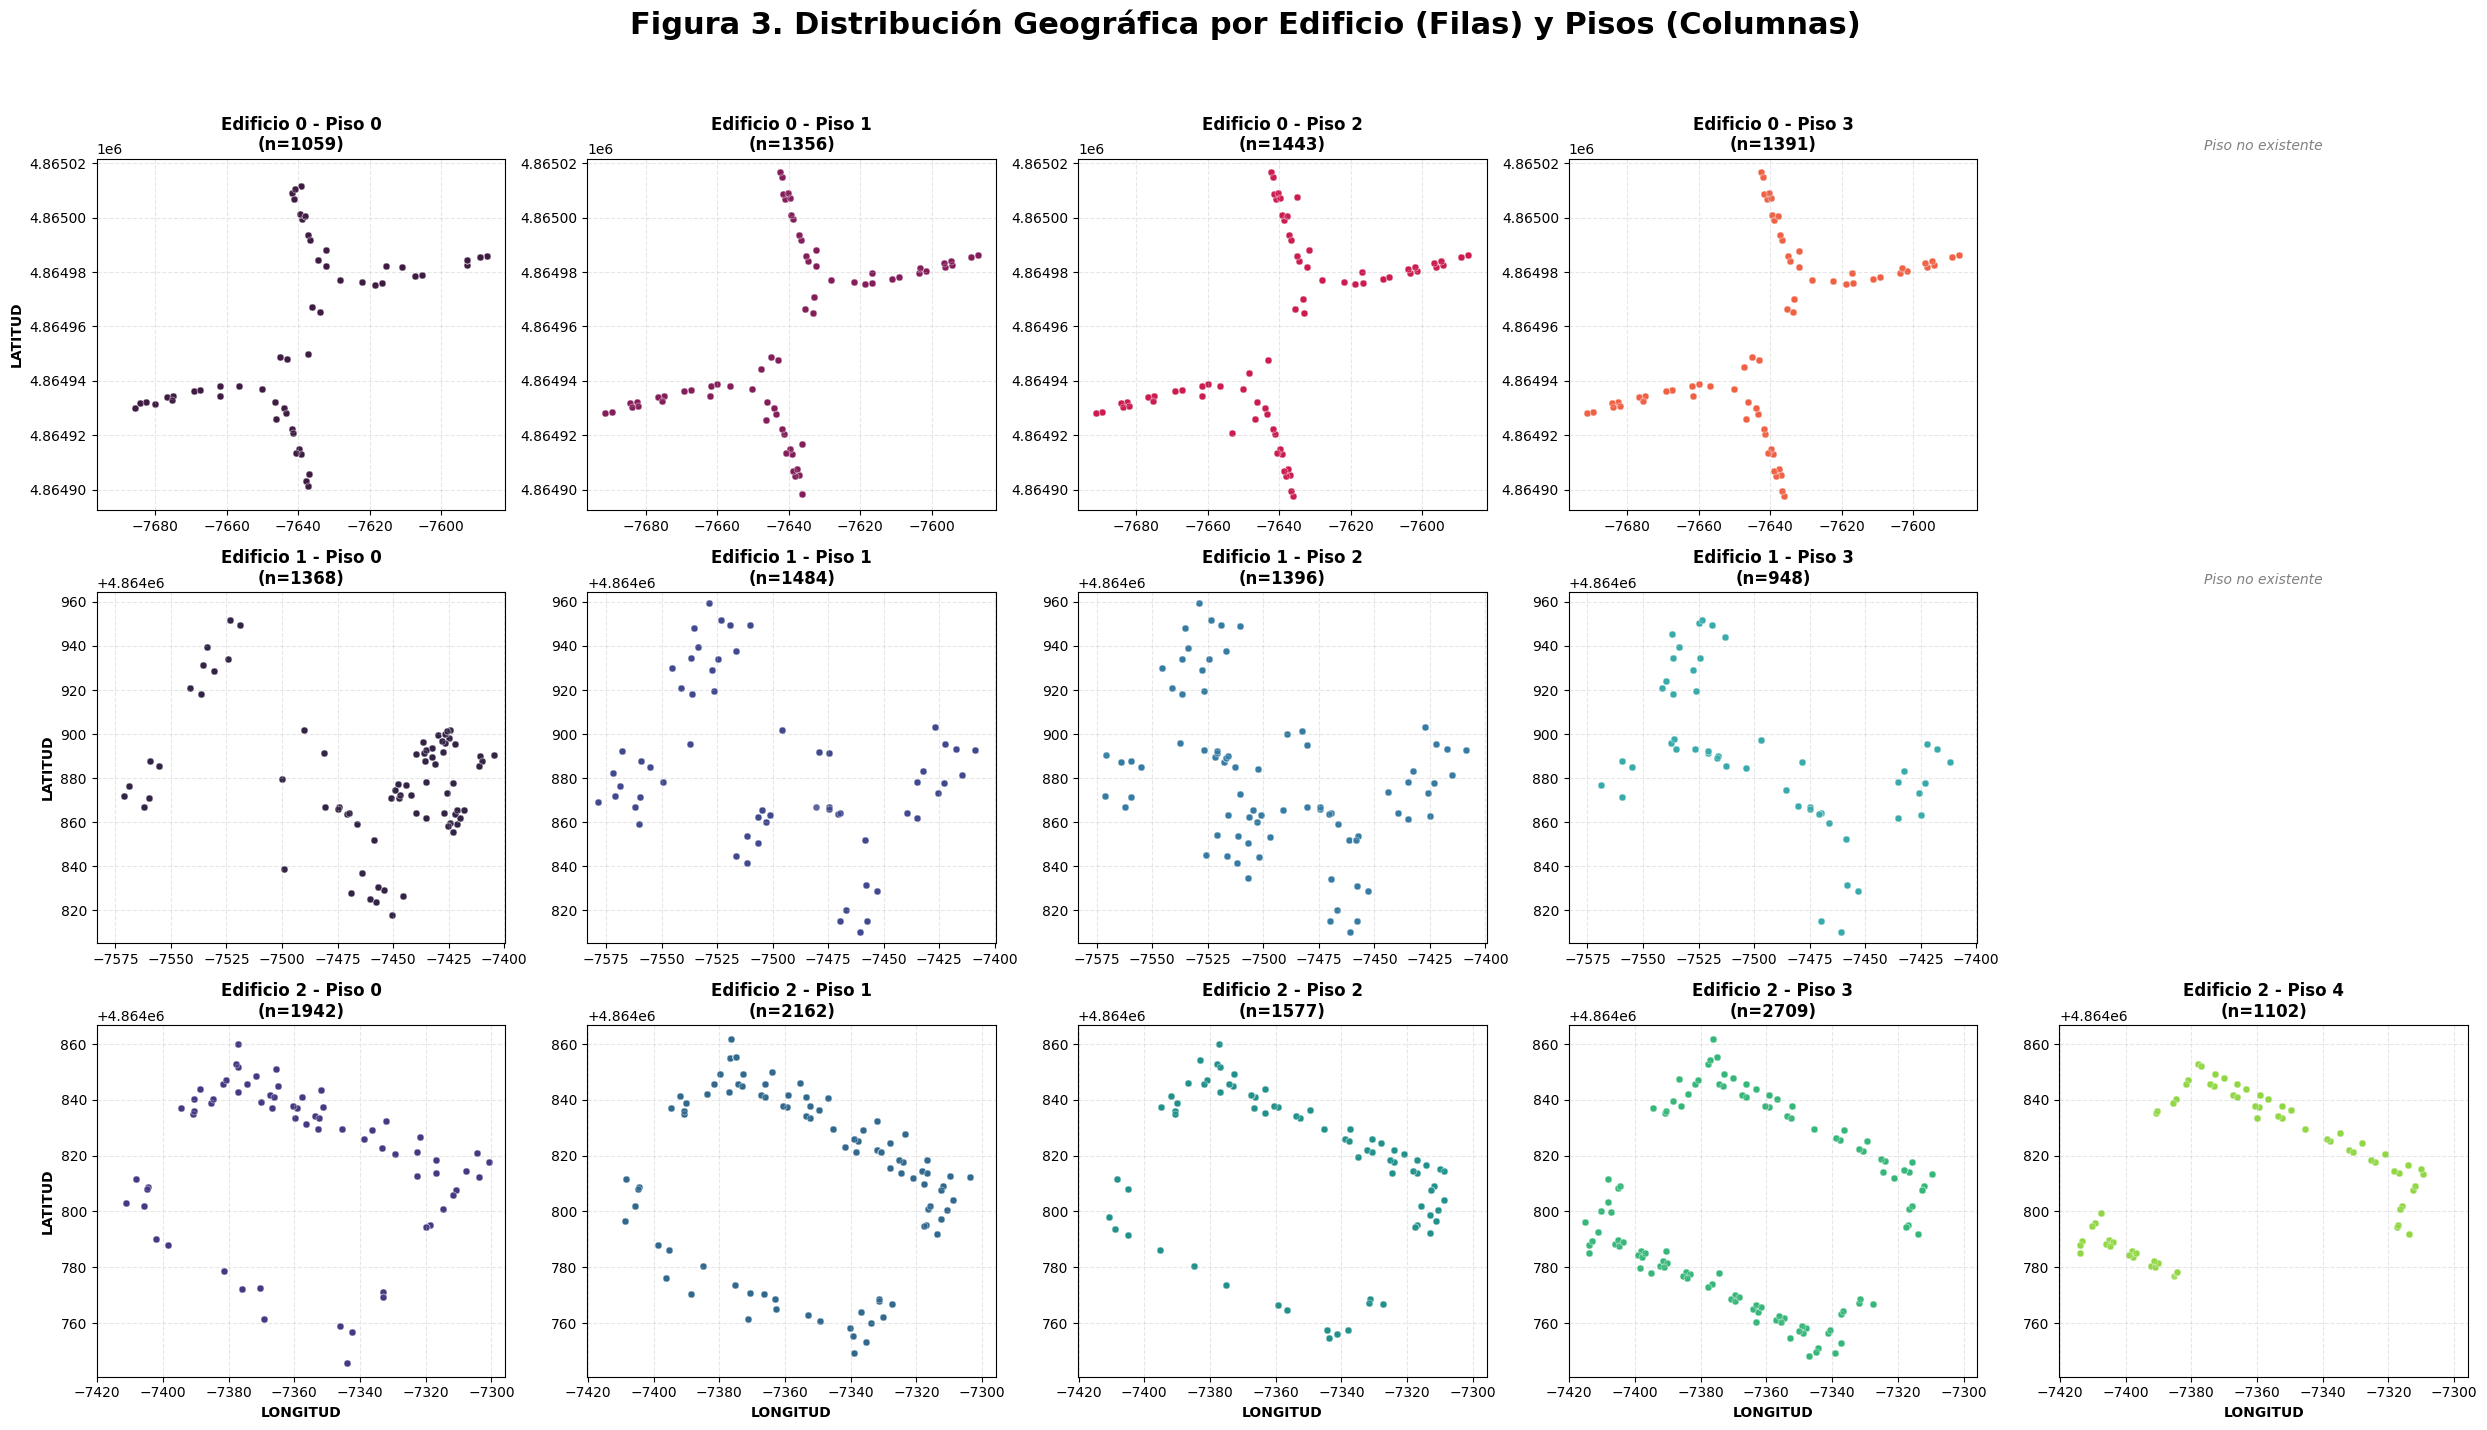

In [16]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Configuración de la figura (3 edificios x 5 pisos máximos)
fig, axes = plt.subplots(3, 5, figsize=(25, 15), sharex=False, sharey=False)

# Definimos paletas de colores para identificar cada edificio rápidamente
paletas = ['rocket', 'mako', 'viridis']
edificios = [0, 1, 2]

# 2. Bucle para recorrer cada edificio (Fila)
for fila, b_id in enumerate(edificios):
    # Filtrar datos del edificio actual
    df_b = df_final[df_final['BUILDINGID'] == b_id]
    pisos = sorted(df_b['FLOOR'].unique())

    # Definir límites de ejes por edificio para que la forma sea comparable
    lon_min, lon_max = df_b['LONGITUDE'].min() - 5, df_b['LONGITUDE'].max() + 5
    lat_min, lat_max = df_b['LATITUDE'].min() - 5, df_b['LATITUDE'].max() + 5

    # Colores para los pisos de este edificio
    colores = sns.color_palette(paletas[fila], n_colors=5)

    # 3. Bucle para recorrer cada piso (Columna)
    for col in range(5):
        ax = axes[fila, col]

        if col in pisos:
            # Graficar puntos si el piso existe
            df_f = df_b[df_b['FLOOR'] == col]
            sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=df_f,
                            ax=ax, color=colores[col], alpha=0.6, s=25)

            ax.set_title(f'Edificio {b_id} - Piso {col}\n(n={len(df_f)})', fontsize=12, fontweight='bold')
            ax.set_xlim(lon_min, lon_max)
            ax.set_ylim(lat_min, lat_max)
            ax.grid(True, linestyle='--', alpha=0.3)
        else:
            # Ocultar cuadros donde el edificio no tiene ese piso
            ax.axis('off')
            if col == 4 and b_id < 2:
                ax.set_title('Piso no existente', fontsize=10, color='gray', style='italic')

        # Solo poner etiquetas en los bordes para no saturar
        if col == 0: ax.set_ylabel('LATITUD', fontweight='bold')
        else: ax.set_ylabel('')
        if fila == 2: ax.set_xlabel('LONGITUD', fontweight='bold')
        else: ax.set_xlabel('')

# Título General
plt.suptitle('Figura 3. Distribución Geográfica por Edificio (Filas) y Pisos (Columnas)',
             fontsize=22, fontweight='bold', y=0.98)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# PCA del edificio 2

In [17]:
# @title
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# 1. Preparar datos del Edificio 2 (Normalizados)
df_b2 = df_final[df_final['BUILDINGID'] == 2]
waps_b2 = df_b2.iloc[:, 0:520]

# --- PASO A: FILTRADO INICIAL ---

# Criterio 1: Eliminar WAPs que no tienen varianza (son constantes)
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0)
waps_filtrados = selector.fit_transform(waps_b2)

# Ver cuántos quedaron tras el filtro inicial
n_despues_varianza = waps_filtrados.shape[1]
print(f"1. WAPs tras eliminar constantes: {n_despues_varianza}")

# --- PASO B: REDUCCIÓN POR PCA ---

# Criterio 3: Mantener el 95% de la varianza explicada
pca = PCA(n_components=0.95)
waps_pca = pca.fit_transform(waps_filtrados)

n_final = waps_pca.shape[1]
print(f"2. Componentes finales tras PCA (95% varianza): {n_final}")

# 3. Crear el DataFrame final reducido
df_pca_final = pd.DataFrame(waps_pca)

1. WAPs tras eliminar constantes: 203
2. Componentes finales tras PCA (95% varianza): 49


Para el Edificio 2, logramos reducir la complejidad del problema en un 90% (pasando de 520 variables a solo **49 componentes principales**). Lo más increíble es que con este pequeño grupo de 49 componentes, **conservamos el 95% de la información original**, lo que garantiza que el clustering será extremadamente eficiente y rápido.

Dataset preparado: 49 componentes y 9492 etiquetas.


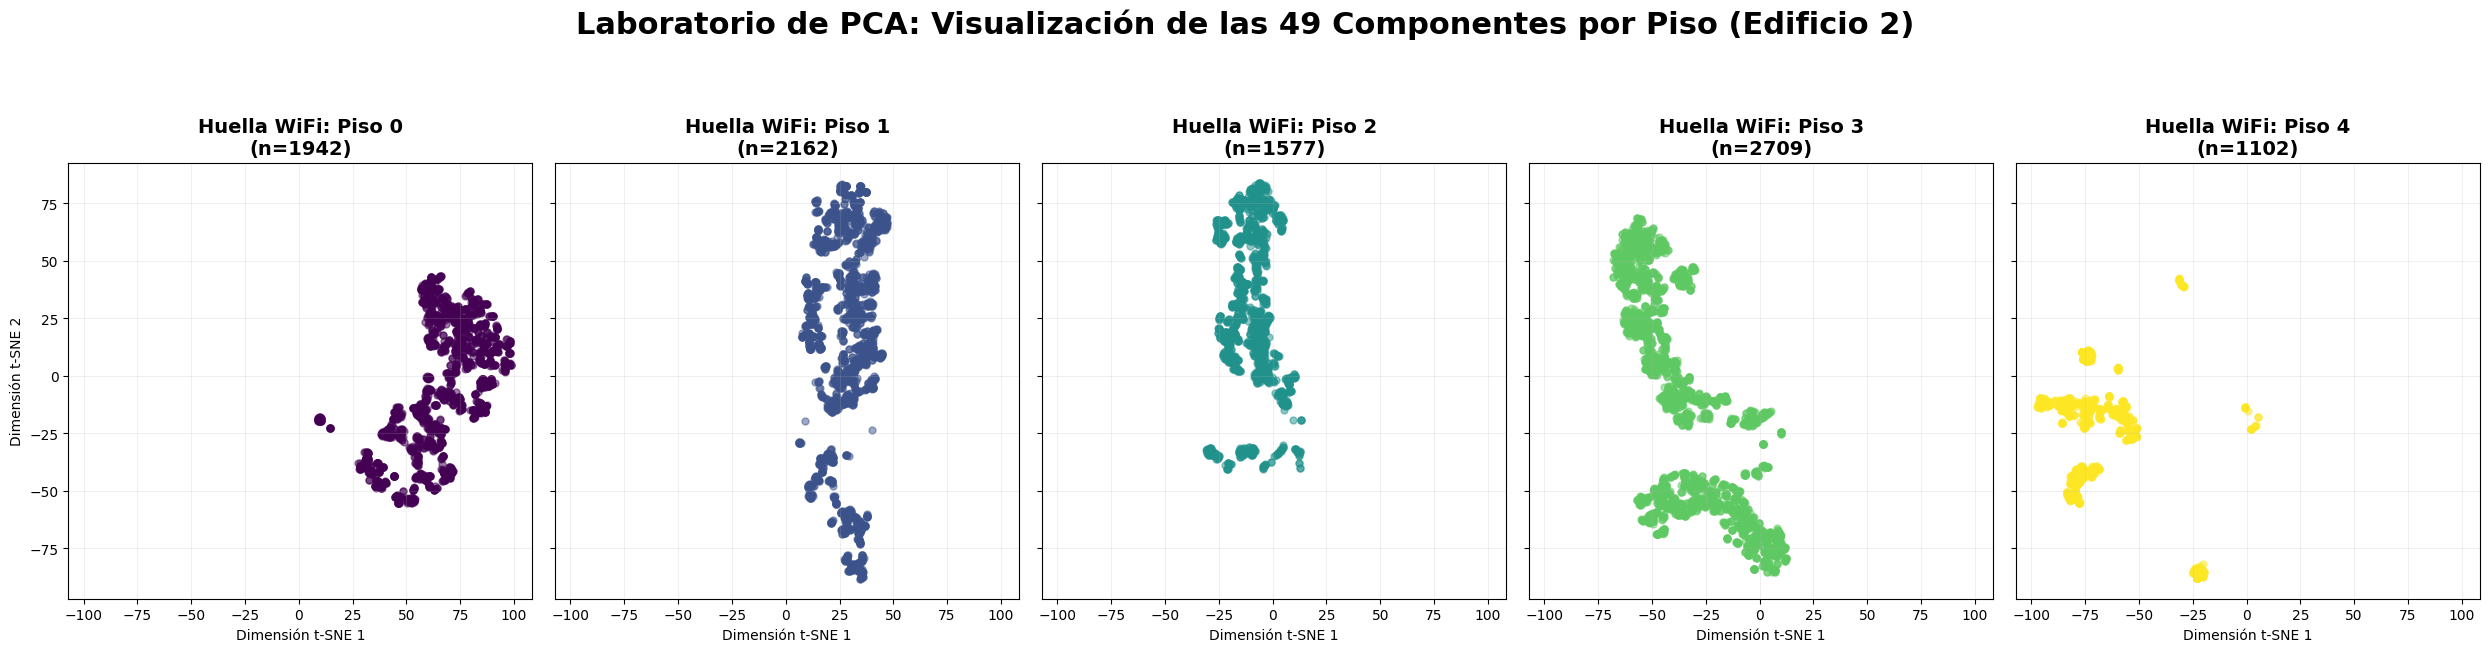

In [18]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 1. Aseguramos que tenemos los datos del Edificio 2 y sus etiquetas
df_b2 = df_final[df_final['BUILDINGID'] == 2].copy()
waps_b2 = df_b2.iloc[:, 0:520]
# Aquí definimos la variable que faltaba
etiquetas_b2 = df_b2.iloc[:, 520:]

# 2. Re-aplicamos el PCA (para asegurar que df_pca_final esté activo)
pca = PCA(n_components=0.95)
waps_pca = pca.fit_transform(waps_b2)
df_pca_final = pd.DataFrame(waps_pca)

print(f"Dataset preparado: {df_pca_final.shape[1]} componentes y {len(etiquetas_b2)} etiquetas.")

# 3. Preparamos la visualización
df_visualizacion = df_pca_final.copy()
df_visualizacion['PISO'] = etiquetas_b2['FLOOR'].values

# 4. Aplicamos t-SNE (Aplanamos las 49 dimensiones a 2)
# Nota: Si tienes muchos datos, esto puede tardar unos 30-60 segundos
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
puntos_2d = tsne.fit_transform(df_pca_final)

# 5. Graficamos los 5 pisos en una fila
fig, axes = plt.subplots(1, 5, figsize=(25, 6), sharex=True, sharey=True)
colores = ['#440154', '#3b528b', '#21918c', '#5ec962', '#fde725']

for i in range(5):
    mask = df_visualizacion['PISO'] == i
    axes[i].scatter(puntos_2d[mask, 0], puntos_2d[mask, 1],
                    color=colores[i], alpha=0.5, s=25)

    axes[i].set_title(f'Huella WiFi: Piso {i}\n(n={mask.sum()})', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Dimensión t-SNE 1')
    if i == 0: axes[i].set_ylabel('Dimensión t-SNE 2')
    axes[i].grid(True, alpha=0.2)

plt.suptitle('Laboratorio de PCA: Visualización de las 49 Componentes por Piso (Edificio 2)',
             fontsize=22, fontweight='bold', y=1.08)

plt.tight_layout()
plt.show()

# Waps con mayor frecuencia

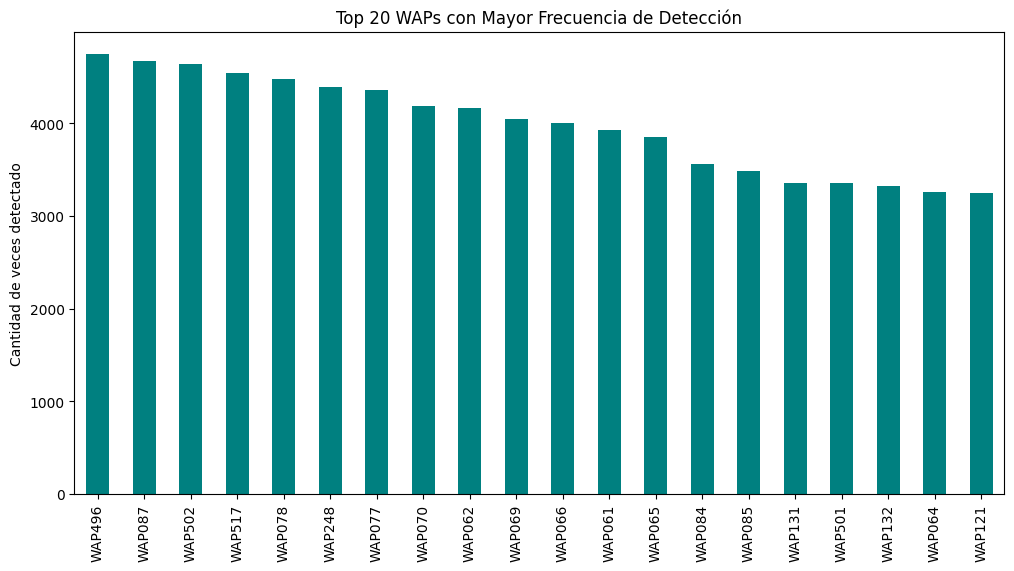

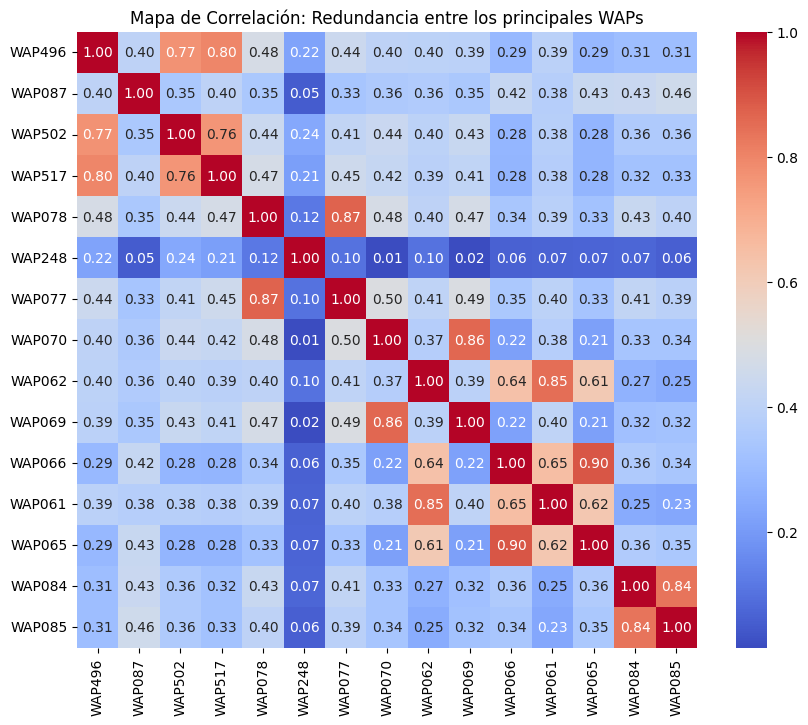

In [19]:
# @title
# 1. Identificamos los 20 WAPs que más señales detectan (valores > 0)
num_detecciones = (df_final.iloc[:, 0:520] > 0).sum().sort_values(ascending=False)
top_20_waps = num_detecciones.head(20)

plt.figure(figsize=(12, 6))
top_20_waps.plot(kind='bar', color='teal')
plt.title('Top 20 WAPs con Mayor Frecuencia de Detección')
plt.ylabel('Cantidad de veces detectado')
plt.show()

# 2. Mapa de Correlación de los Top 15 WAPs
plt.figure(figsize=(10, 8))
top_15_names = top_20_waps.head(15).index
sns.heatmap(df_final[top_15_names].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlación: Redundancia entre los principales WAPs')
plt.show()

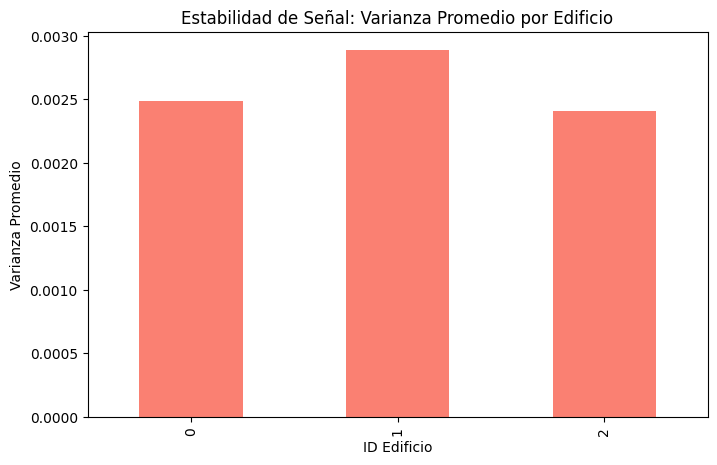

Varianza por edificio:
BUILDINGID
0    0.002488
1    0.002888
2    0.002409
dtype: float64


In [20]:
# @title
# Calculamos la varianza promedio de todas las señales por cada edificio
varianza_por_edificio = df_final.groupby('BUILDINGID').var().iloc[:, 0:520].mean(axis=1)

plt.figure(figsize=(8, 5))
varianza_por_edificio.plot(kind='bar', color='salmon')
plt.title('Estabilidad de Señal: Varianza Promedio por Edificio')
plt.xlabel('ID Edificio')
plt.ylabel('Varianza Promedio')
plt.show()

print("Varianza por edificio:")
print(varianza_por_edificio)

**Edificio 2**: Presenta la mayor estabilidad con la varianza más baja ($0.002409$), lo que facilitará la formación de clústeres cohesionados y con métricas de silueta superiores.



Total de registros analizados: 19937
Registros detectados como Outliers (0 señales): 76


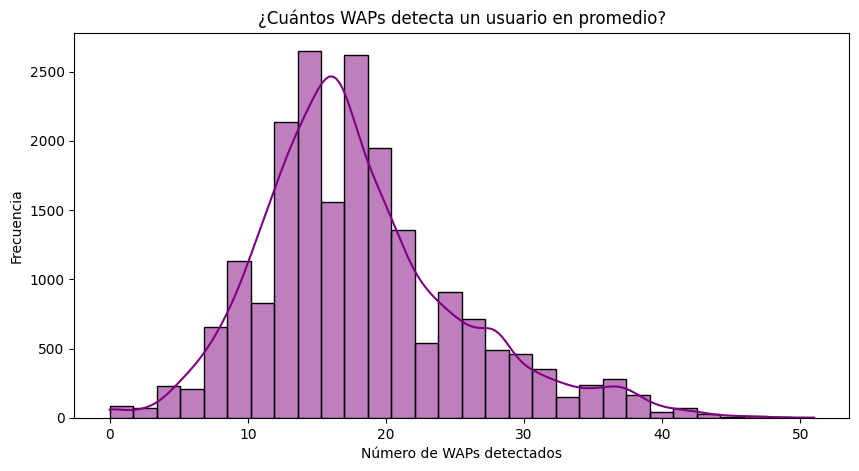

In [21]:
# @title
#Outliers
# WAPs tienen señal (>0) por cada fila
detecciones_por_fila = (df_final.iloc[:, 0:520] > 0).sum(axis=1)

# Filas con 0 señales (Outliers totales)
outliers_totales = df_final[detecciones_por_fila == 0]

print(f"Total de registros analizados: {len(df_final)}")
print(f"Registros detectados como Outliers (0 señales): {len(outliers_totales)}")

# Visualizamos la distribución de cuántas señales detecta un usuario
plt.figure(figsize=(10, 5))
sns.histplot(detecciones_por_fila, bins=30, kde=True, color='purple')
plt.title('¿Cuántos WAPs detecta un usuario en promedio?')
plt.xlabel('Número de WAPs detectados')
plt.ylabel('Frecuencia')
plt.show()

El histograma revela que un usuario detecta, en promedio, solo entre 15 y 20 WAPs de los 520 disponibles

# **Reduccion de dimensionalidad**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import umap

In [23]:
# 1. Preparar TODOS los datos (WAPs y etiquetas)
waps_all = df_final.iloc[:, 0:520]
edificios = df_final['BUILDINGID']

# 2. Pre-procesamiento
selector = VarianceThreshold(threshold=0)
waps_filtrados = selector.fit_transform(waps_all)
print(f"WAPS available: {waps_filtrados.shape[1]}")

# B. Escalado: Crucial para que las distancias sean comparables
scaler = StandardScaler()
waps_scaled = scaler.fit_transform(waps_filtrados)
n_dim_max = waps_filtrados.shape[1]

WAPS available: 465


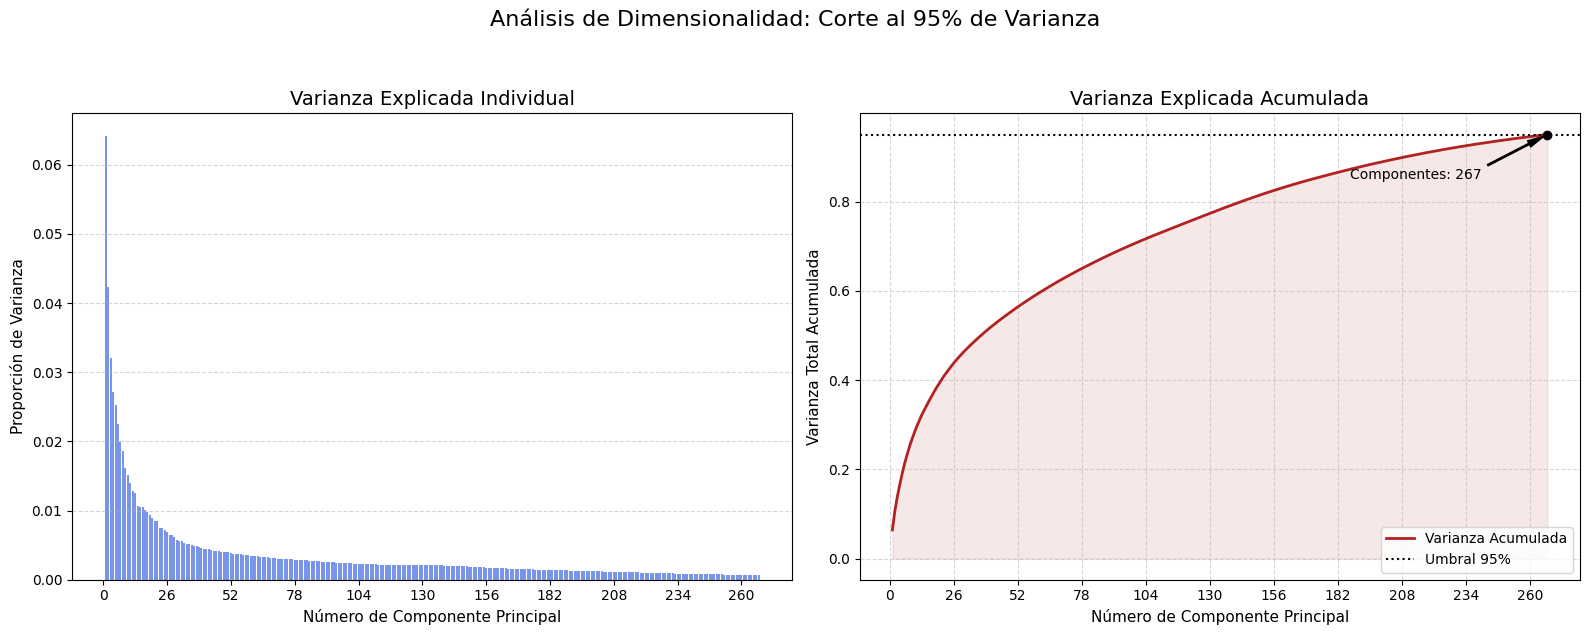

Se requieren 267 componentes para alcanzar el 95.04% de varianza.


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. Preparación de datos: Buscamos el 95% de la varianza
pca_final = PCA(n_components=0.95)
pca_final.fit(waps_scaled)

exp_var_ind = pca_final.explained_variance_ratio_
exp_var_cum = np.cumsum(exp_var_ind)
n_componentes = len(exp_var_ind) # Cantidad exacta para el umbral

# 2. Generación de los subplots (1 fila, 2 columnas)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot Izquierdo: Varianza Individual ---
ax1.bar(range(1, n_componentes + 1), exp_var_ind, alpha=0.7,
        color='royalblue', label='Varianza por componente')
ax1.set_title('Varianza Explicada Individual', fontsize=14)
ax1.set_xlabel('Número de Componente Principal', fontsize=11)
ax1.set_ylabel('Proporción de Varianza', fontsize=11)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# --- Plot Derecho: Varianza Acumulada ---
ax2.plot(range(1, n_componentes + 1), exp_var_cum,
         color='firebrick', linewidth=2, label='Varianza Acumulada')
ax2.fill_between(range(1, n_componentes + 1), exp_var_cum, color='firebrick', alpha=0.1)

# Línea de referencia y anotación del punto de corte
ax2.axhline(y=0.95, color='black', linestyle=':', label='Umbral 95%')
ax2.scatter(n_componentes, exp_var_cum[-1], color='black', zorder=5)
ax2.annotate(f'Componentes: {n_componentes}',
             xy=(n_componentes, exp_var_cum[-1]),
             xytext=(n_componentes*0.7, 0.85),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))

ax2.set_title('Varianza Explicada Acumulada', fontsize=14)
ax2.set_xlabel('Número de Componente Principal', fontsize=11)
ax2.set_ylabel('Varianza Total Acumulada', fontsize=11)
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.legend(loc='lower right')

# Ajuste automático de ticks para que no se saturen
paso = max(1, n_componentes // 10)
ticks = np.arange(0, n_componentes + 1, paso)
ax1.set_xticks(ticks)
ax2.set_xticks(ticks)

plt.suptitle('Análisis de Dimensionalidad: Corte al 95% de Varianza', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

print(f"Se requieren {n_componentes} componentes para alcanzar el {exp_var_cum[-1]:.2%} de varianza.")

Oara conservar el 95% de la varianza, el modelo requiere 267 componentes principales. Esto representa más del 51% de las 520 variables originales. Esto indica una baja redundancia en los datos iniciales. No es una compresión drástica, lo que sugiere que las señales de los WAPs están muy dispersas y cada una aporta información casi única.

**Mantener 267 variables para una tarea de clasificación en tiempo real (como navegación en interiores) es computacionalmente pesado.**


- Crecimiento inicial: La curva acumulada sube rápidamente en los primeros 20 a 50 componentes. Aquí es donde se captura la "macro-estructura" de los datos.

- Zona de Rendimientos decrecientes: La pendiente de la curva roja se vuelve muy suave, se está añadiendo mucha complejidad para capturar detalles que probablemente sean solo ruido ambiental o fluctuaciones menores de la señal WiFi.


## Clusterización por Edificio

El dataset fue obtenido con

### PCA

Calculando métricas para diferentes dimensiones...


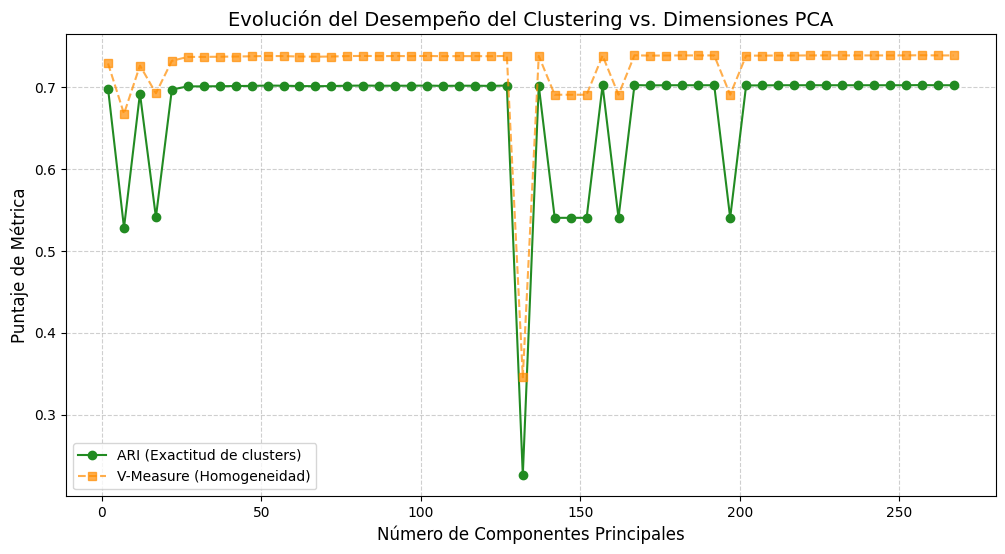

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, v_measure_score
# 1. Definir el rango de componentes a evaluar
# Probamos de 2 a 267 para ver la evolución completa
componentes_eje = np.arange(2, 268, 5) # Pasos de 5 para que corra rápido
ari_historia = []
v_historia = []

print("Calculando métricas para diferentes dimensiones...")

for n in componentes_eje:
    # Reducción
    pca_temp = PCA(n_components=n)
    waps_red = pca_temp.fit_transform(waps_scaled)

    # Clustering (K=3 para los 3 edificios)
    kmeans_temp = KMeans(n_clusters=3, random_state=42, n_init=10)
    labels_pred = kmeans_temp.fit_predict(waps_red)

    # Guardar métricas
    ari_historia.append(adjusted_rand_score(df_final['BUILDINGID'], labels_pred))
    v_historia.append(v_measure_score(df_final['BUILDINGID'], labels_pred))

# 2. Generar la Gráfica
plt.figure(figsize=(12, 6))

plt.plot(componentes_eje, ari_historia, marker='o', linestyle='-', color='forestgreen', label='ARI (Exactitud de clusters)')
plt.plot(componentes_eje, v_historia, marker='s', linestyle='--', color='darkorange', alpha=0.7, label='V-Measure (Homogeneidad)')


plt.title('Evolución del Desempeño del Clustering vs. Dimensiones PCA', fontsize=14)
plt.xlabel('Número de Componentes Principales', fontsize=12)
plt.ylabel('Puntaje de Métrica', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

El ARI se mantiene entre 0.70 desde apenas los 20-25 componentes hasta los 120 No se necesitan los 267 componentes. Con pocas dimensiones, se obtiene exactamente el mismo desempeño que con el doble o el triple de datos.

- Inestabilidad por Ruido: Las caídas drásticas (como en el componente 130) son "shocks" de ruido. Al añadir ciertas dimensiones de baja varianza, el algoritmo de K-Means se confunde y los clústeres de los edificios se mezclan. Esto refuerza la idea de que "más datos no siempre es mejor".

Calculando métricas para diferentes dimensiones...


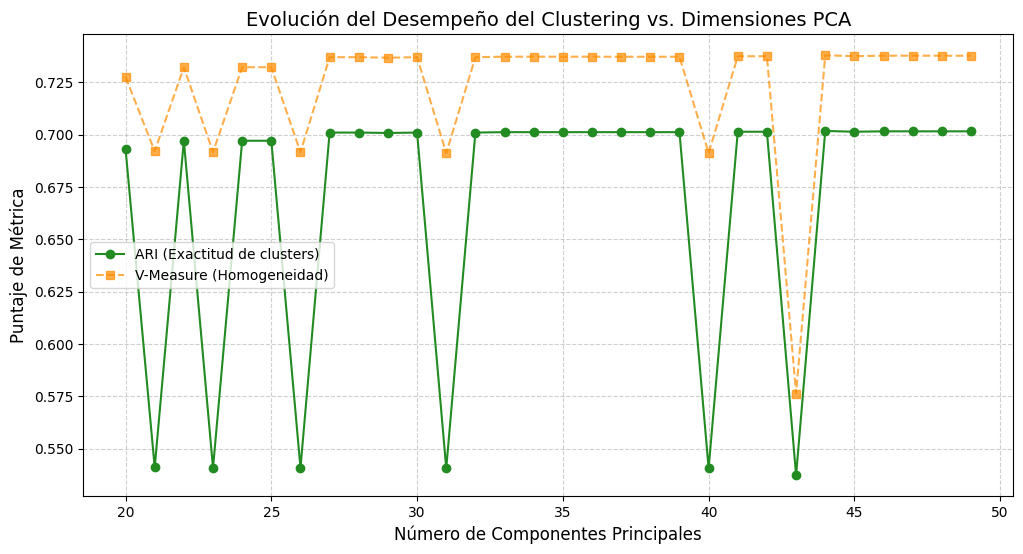

In [26]:
# 1. Definir el rango de componentes a evaluar
# Probamos de 20 a 50 para ver la evolución completa
componentes_eje = np.arange(20, 50, 1)
ari_historia = []
v_historia = []

print("Calculando métricas para diferentes dimensiones...")

for n in componentes_eje:
    # Reducción
    pca_temp = PCA(n_components=n)
    waps_red = pca_temp.fit_transform(waps_scaled)

    # Clustering (K=3 para los 3 edificios)
    kmeans_temp = KMeans(n_clusters=3, random_state=42, n_init=10)
    labels_pred = kmeans_temp.fit_predict(waps_red)

    # Guardar métricas
    ari_historia.append(adjusted_rand_score(df_final['BUILDINGID'], labels_pred))
    v_historia.append(v_measure_score(df_final['BUILDINGID'], labels_pred))

# 2. Generar la Gráfica
plt.figure(figsize=(12, 6))

plt.plot(componentes_eje, ari_historia, marker='o', linestyle='-', color='forestgreen', label='ARI (Exactitud de clusters)')
plt.plot(componentes_eje, v_historia, marker='s', linestyle='--', color='darkorange', alpha=0.7, label='V-Measure (Homogeneidad)')


plt.title('Evolución del Desempeño del Clustering vs. Dimensiones PCA', fontsize=14)
plt.xlabel('Número de Componentes Principales', fontsize=12)
plt.ylabel('Puntaje de Métrica', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

El **ARI** alcanza su valor **máximo** por primera vez alrededor del **componente 27** y se mantiene estable a pesar del incremento de dimensiones. Esto demuestra que con apenas 27 componentes principales ya se ha extraído toda la información linealmente separable necesaria para identificar los edificios. Cualquier componente adicional después de este punto es varianza residual que no contribuye a la exactitud del clustering.

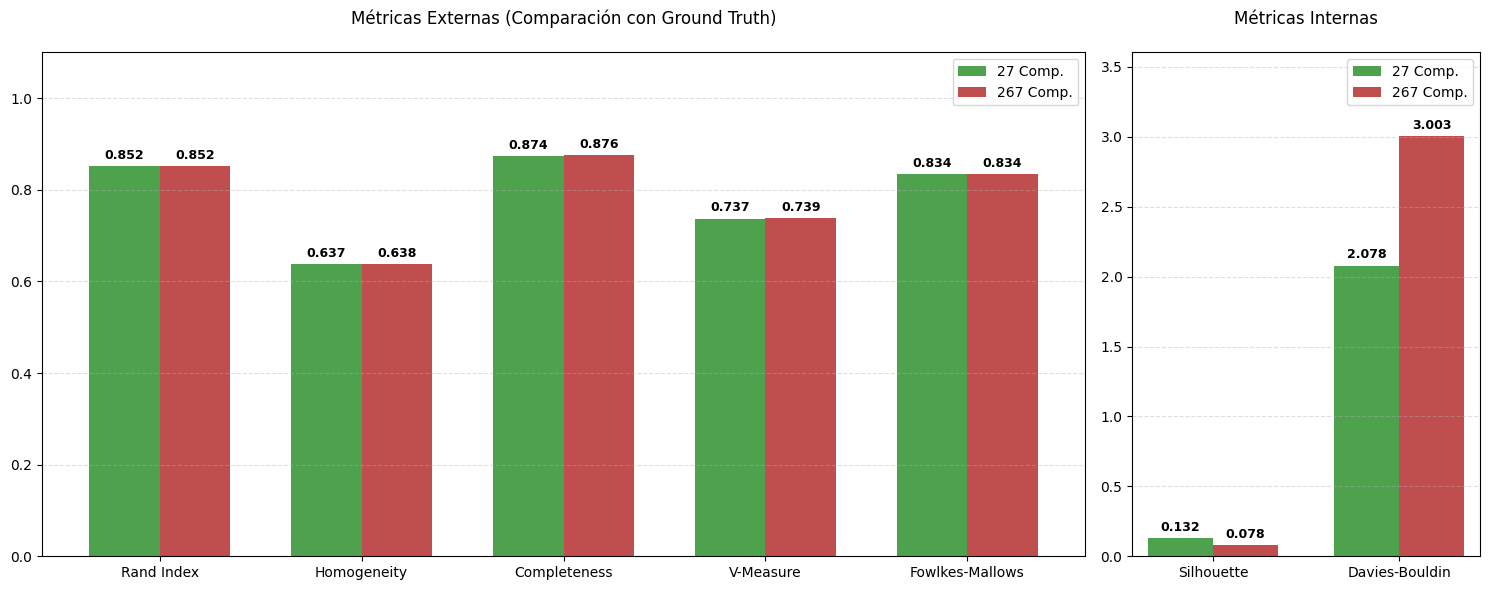

In [27]:
from sklearn.metrics import (silhouette_score, davies_bouldin_score,
                             rand_score, homogeneity_score,
                             completeness_score, v_measure_score,
                             fowlkes_mallows_score)

labels_reales = df_final['BUILDINGID']
def evaluar_pca(n):
    pca = PCA(n_components=n)
    data_pca = pca.fit_transform(waps_scaled)
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_pca)

    return {
        'Rand Index': rand_score(labels_reales, labels),
        'Homogeneity': homogeneity_score(labels_reales, labels),
        'Completeness': completeness_score(labels_reales, labels),
        'V-Measure': v_measure_score(labels_reales, labels),
        'Fowlkes-Mallows': fowlkes_mallows_score(labels_reales, labels),
        'Silhouette': silhouette_score(data_pca, labels),
        'Davies-Bouldin': davies_bouldin_score(data_pca, labels)
    }

resultados_27 = evaluar_pca(27)
resultados_267 = evaluar_pca(267)

metrics_ext = ['Rand Index', 'Homogeneity', 'Completeness', 'V-Measure', 'Fowlkes-Mallows']
metrics_int = ['Silhouette', 'Davies-Bouldin']

vals_ext_27 = [resultados_27[m] for m in metrics_ext]
vals_ext_267 = [resultados_267[m] for m in metrics_ext]

vals_int_27 = [resultados_27[m] for m in metrics_int]
vals_int_267 = [resultados_267[m] for m in metrics_int]

# Configuración de estilo
x_ext = np.arange(len(metrics_ext))
x_int = np.arange(len(metrics_int))
width = 0.35

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [3, 1]})

def add_labels(ax, rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

# --- PLOT 1: Métricas Externas (0 a 1) ---
rects1 = ax1.bar(x_ext - width/2, vals_ext_27, width, label='27 Comp.', color='forestgreen', alpha=0.8)
rects2 = ax1.bar(x_ext + width/2, vals_ext_267, width, label='267 Comp.', color='firebrick', alpha=0.8)

ax1.set_title('Métricas Externas (Comparación con Ground Truth)', pad=20)
ax1.set_xticks(x_ext)
ax1.set_xticklabels(metrics_ext)
ax1.set_ylim(0, 1.1)
add_labels(ax1, rects1)
add_labels(ax1, rects2)

# --- PLOT 2: Métricas Internas (Estructura del Cluster) ---
rects3 = ax2.bar(x_int - width/2, vals_int_27, width, label='27 Comp.', color='forestgreen', alpha=0.8)
rects4 = ax2.bar(x_int + width/2, vals_int_267, width, label='267 Comp.', color='firebrick', alpha=0.8)

ax2.set_title('Métricas Internas', pad=20)
ax2.set_xticks(x_int)
ax2.set_xticklabels(metrics_int)
# Expandimos un poco el límite superior para que quepa el label de Davies-Bouldin
ax2.set_ylim(0, max(vals_int_27 + vals_int_267) * 1.2)
add_labels(ax2, rects3)
add_labels(ax2, rects4)

# Detalles finales
for ax in [ax1, ax2]:
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


- Se logra prácticamente el mismo desempeño en clasificación obtenido con 267 dimensiones, pero con un 90% menos de datos.


- El modelo eficiente tiene mejores métricas internas (Silhouette más alto y Davies-Bouldin más bajo), lo que significa que sus clústeres son más compactos y menos ambiguos que los del modelo de alta varianza.


Usar 267 dimensiones introduce mayor varianza (95%) pero también ruido, el cual degrada la forma de los clústeres sin aportar beneficios reales a la precisión de la localización.

#### Análisis métricas externas
- Rand Index: Indica una alineación muy alta entre los clústeres y las etiquetas reales. Según la escala, un valor de 1.0 es un acuerdo perfecto; estar por encima de 0.8 refleja que la gran mayoría de los pares de puntos están correctamente agrupados o separados.

- Homogeneity: Esta métrica asegura que cada clúster contenga solo puntos de una única clase. Un puntaje de ~0.64 sugiere que, aunque los clústeres son mayoritariamente puros, existe cierta mezcla de clases reales dentro de los grupos generados.
+2

- Completeness: Es la métrica externa con mejor desempeño. Indica que casi todos los miembros de una clase real fueron asignados al mismo clúster. Al ser mayor que la homogeneidad, el modelo es mejor "recuperando" clases enteras que evitando mezclas dentro de los grupos.

- V-Measure: Al ser la media armónica entre homogeneidad y completitud , este puntaje de ~0.74 representa un equilibrio sólido, indicando un agrupamiento de alta calidad respecto a la realidad.

**No hay una diferencia significativa entre usar 27 o 267 componentes para las métricas externas. La eficiencia de 27 componentes es preferible, ya que mantiene casi el mismo nivel de precisión que el modelo con máxima varianza.**

#### Análisis métricas externas

- Silhouette Score (0.132 vs 0.078): Esta métrica mide la separación y cohesión. Los valores obtenidos son bajos (cercanos a 0), lo que indica clústeres superpuestos o límites ambiguos entre ellos.

El modelo de 27 componentes (0.132) es superior al de 267 (0.078). A medida que aumentan las dimensiones, la "maldición de la dimensionalidad" suele hacer que las distancias sean menos significativas, reduciendo este puntaje.

- Davies-Bouldin Index (2.078 vs 3.003): Mide la relación entre la dispersión dentro del clúster y la separación entre ellos. En esta métrica, valores más bajos son mejores (0 es el ideal). Un valor de 2.078 indica que hay cierta separación, pero también solapamiento significativo. El incremento a 3.003 con 267 componentes confirma que añadir demasiadas dimensiones degrada la separación física de los clústeres.



#### Conclusión

El modelo se comporta de manera excelente frente a la realidad (Métricas Externas), pero muestra debilidades estructurales (Métricas Internas). Esto es común en datos de alta dimensionalidad como los IDs de edificios (WAPs), donde las fronteras entre zonas pueden no ser geométricamente claras (hiperesferas perfectas), aunque el algoritmo logre identificar los patrones correctos.

### t-SNE y UMAP

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


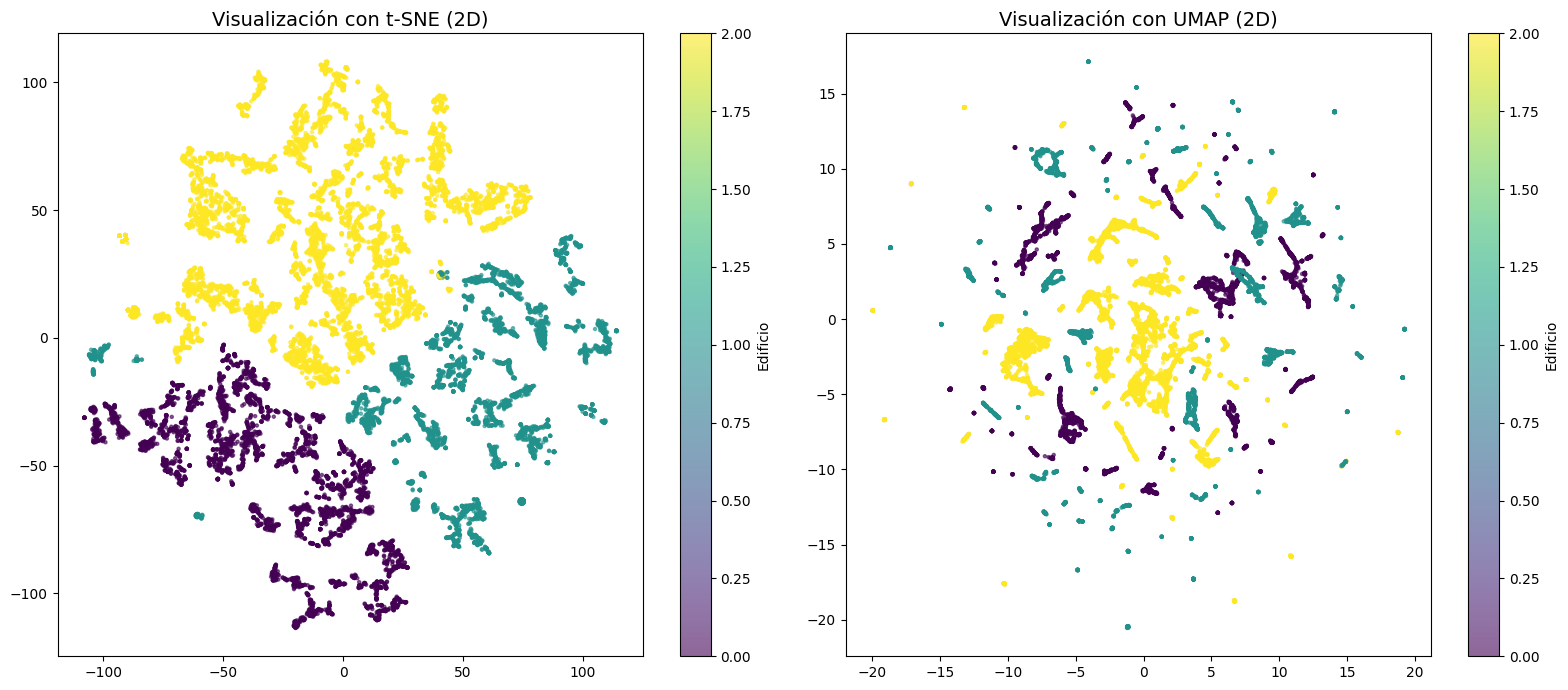

In [28]:
# 1. Paso previo: PCA para reducir ruido (de 520 a 50 dims)
pca_pre = PCA(n_components=27)
waps_pca_pre = pca_pre.fit_transform(waps_scaled)

# 2. t-SNE (Reducción a 2D)
# Perplexity es el parámetro clave (puedes probar entre 30 y 50)
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
waps_tsne = tsne.fit_transform(waps_pca_pre)

# 3. UMAP (Reducción a 2D)
# Suele ser más rápido y preserva mejor la estructura global que t-SNE
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
waps_umap = reducer.fit_transform(waps_pca_pre)

# 4. Visualización Comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot t-SNE
scatter1 = ax1.scatter(waps_tsne[:, 0], waps_tsne[:, 1], c=df_final['BUILDINGID'], cmap='viridis', s=5, alpha=0.6)
ax1.set_title('Visualización con t-SNE (2D)', fontsize=14)
fig.colorbar(scatter1, ax=ax1, label='Edificio')

# Plot UMAP
scatter2 = ax2.scatter(waps_umap[:, 0], waps_umap[:, 1], c=df_final['BUILDINGID'], cmap='viridis', s=5, alpha=0.6)
ax2.set_title('Visualización con UMAP (2D)', fontsize=14)
fig.colorbar(scatter2, ax=ax2, label='Edificio')

plt.tight_layout()
plt.show()

- t-SNE: Logra una separación más clara entre los tres edificios (morado, turquesa y amarillo). Los puntos de un mismo edificio ya no están mezclados en una sola masa, sino que forman grupos compactos.

- UMAP: Dentro de cada edificio encontró sub-grupos (pequeños filamentos o clústeres menores). Es muy probable que estos sub-grupos correspondan a los diferentes pisos o pasillos específicos de cada edificio.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


--- Comparativa Final de Modelos ---
                 PCA (27)  PCA (267)  t-SNE (2D)  UMAP (2D)
Rand Index       0.851831   0.852499    0.804833   0.569647
Homogeneity      0.637083   0.638468    0.603933   0.047652
Completeness     0.874005   0.876448    0.581116   0.045833
V-Measure        0.736970   0.738766    0.592305   0.046725
Fowlkes-Mallows  0.833515   0.834351    0.721232   0.384025
Silhouette       0.132034   0.078173    0.374997   0.358601
Davies-Bouldin   2.078419   3.003441    0.863567   0.934650


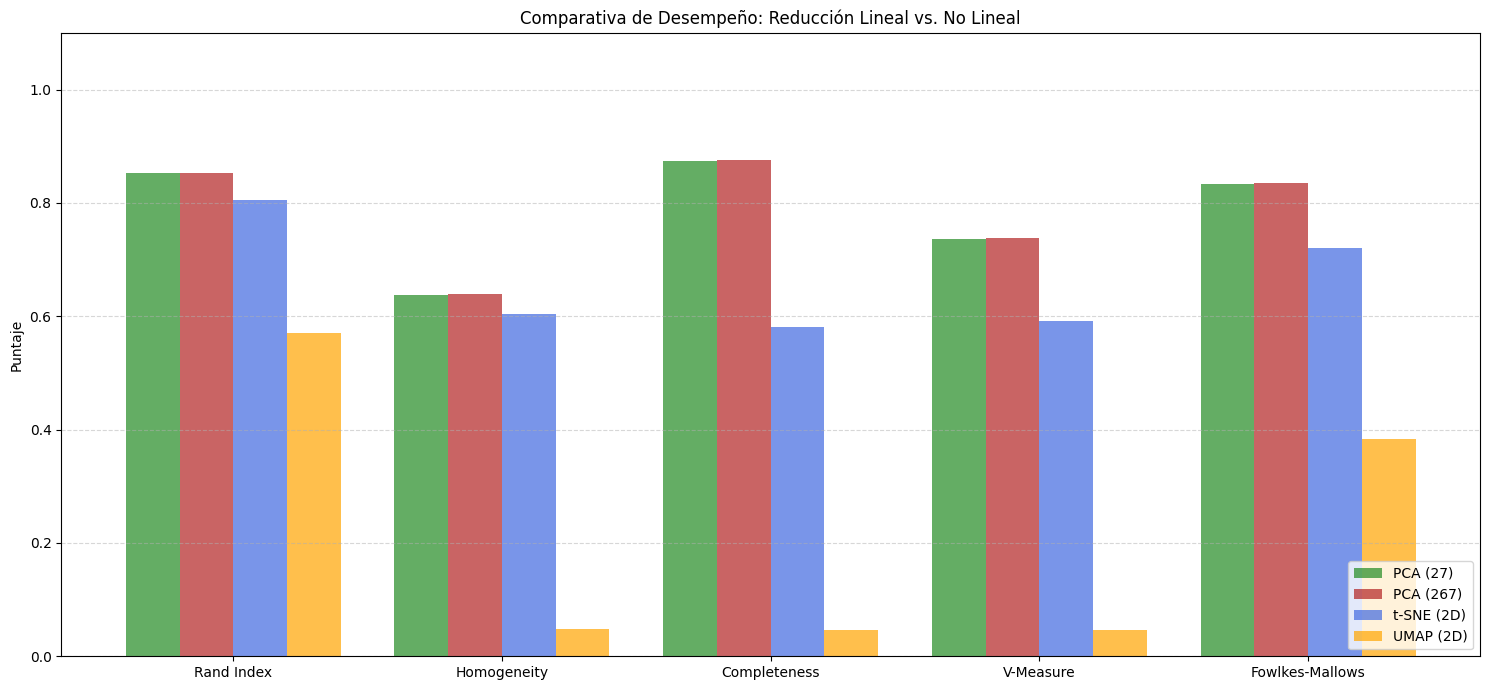

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import umap
from sklearn.metrics import (silhouette_score, davies_bouldin_score,
                             rand_score, homogeneity_score,
                             completeness_score, v_measure_score,
                             fowlkes_mallows_score)

# 1. Definir función de evaluación completa (según el PDF del curso) [cite: 4]
def obtener_metricas(datos, etiquetas_reales):
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    labels_pred = kmeans.fit_predict(datos)

    return {
        'Rand Index': rand_score(etiquetas_reales, labels_pred), # [cite: 320]
        'Homogeneity': homogeneity_score(etiquetas_reales, labels_pred), # [cite: 385]
        'Completeness': completeness_score(etiquetas_reales, labels_pred), # [cite: 308]
        'V-Measure': v_measure_score(etiquetas_reales, labels_pred), # [cite: 309]
        'Fowlkes-Mallows': fowlkes_mallows_score(etiquetas_reales, labels_pred), # [cite: 315]
        'Silhouette': silhouette_score(datos, labels_pred), # [cite: 54]
        'Davies-Bouldin': davies_bouldin_score(datos, labels_pred) # [cite: 107]
    }


# 2. Generar TODAS las reducciones de dimensionalidad necesarias
labels_reales = df_final['BUILDINGID']

# PCA - Los dos escenarios lineales
pca_27_model = PCA(n_components=27)
waps_27 = pca_27_model.fit_transform(waps_scaled)

pca_267_model = PCA(n_components=267)
waps_267 = pca_267_model.fit_transform(waps_scaled)

# t-SNE (Usando el PCA de 27 como pre-paso para reducir ruido)
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
waps_tsne = tsne.fit_transform(waps_27)

# UMAP (Usando el PCA de 27 como pre-paso)
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
waps_umap = reducer.fit_transform(waps_27)

res_pca_27 = obtener_metricas(waps_27, labels_reales)
res_pca_267 = obtener_metricas(waps_267, labels_reales)
res_tsne = obtener_metricas(waps_tsne, labels_reales)
res_umap = obtener_metricas(waps_umap, labels_reales)

df_final_comp = pd.DataFrame([res_pca_27, res_pca_267, res_tsne, res_umap],
                             index=['PCA (27)', 'PCA (267)', 't-SNE (2D)', 'UMAP (2D)'])

print("--- Comparativa Final de Modelos ---")
print(df_final_comp.T)

# 5. Métricas Externas
metrics_ext = ['Rand Index', 'Homogeneity', 'Completeness', 'V-Measure', 'Fowlkes-Mallows']
x = np.arange(len(metrics_ext))
width = 0.2

plt.figure(figsize=(15, 7))
plt.bar(x - 1.5*width, df_final_comp.loc['PCA (27)', metrics_ext], width, label='PCA (27)', color='forestgreen', alpha=0.7)
plt.bar(x - 0.5*width, df_final_comp.loc['PCA (267)', metrics_ext], width, label='PCA (267)', color='firebrick', alpha=0.7)
plt.bar(x + 0.5*width, df_final_comp.loc['t-SNE (2D)', metrics_ext], width, label='t-SNE (2D)', color='royalblue', alpha=0.7)
plt.bar(x + 1.5*width, df_final_comp.loc['UMAP (2D)', metrics_ext], width, label='UMAP (2D)', color='orange', alpha=0.7)

plt.ylabel('Puntaje')
plt.title('Comparativa de Desempeño: Reducción Lineal vs. No Lineal')
plt.xticks(x, metrics_ext)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()

**Evaluación Externa:**

Las métricas que comparan el clustering con las etiquetas reales (edificios) muestran una caída notable:

- Superioridad del PCA: Obtiene el mejor Rand Index (0.8518) y V-Measure (0.7369). Esto indica que las relaciones lineales que captura el PCA son las que realmente definen la ubicación de los edificios.

- El Colapso de UMAP: A pesar de verse muy ordenado, su V-Measure (0.0467) es casi nulo. Esto sucede porque UMAP creó clústeres basados en otras características (quizás cercanía de WAPs específicos) que no coinciden con la división por edificios. La Homogeneidad requiere que cada clúster contenga solo una clase. UMAP falló aquí porque mezcló etiquetas reales en sus nuevas "islas".


**Evaluación Interna**
Aquí es donde t-SNE y UMAP brillan, pero hay que tener cuidado:

- Silhouette Score: El PCA tiene un valor pobre (0.1320), mientras que t-SNE sube a 0.3749. Valores más altos indican mejor ajuste.

- Davies-Bouldin Index (DBI): t-SNE logra un impresionante 0.8635 frente al 2.0784 del PCA. Valores más bajos son mejores, t-SNE genera clústeres mucho más compactos y separados.


**t-SNE y UMAP optimizan la estructura local. Han creado grupos muy densos (buena métrica interna), pero esos grupos no representan a los edificios reales (mala métrica externa).**

------------------------------------------

Para el informe:

"Nos encontramos ante un caso clásico de desalineación de objetivos. Si solo evaluamos la estructura de los datos (Métricas Internas), t-SNE parece superior por su alta densidad y separación. Sin embargo, para el objetivo de navegación interna, el PCA con 27 componentes es el modelo más robusto, ya que preserva la información global necesaria para alcanzar un Rand Index de 0.85, demostrando que la identidad de los edificios reside en las correlaciones lineales de largo alcance de los WAPs y no en las agrupaciones densas locales que generan UMAP o t-SNE."

## Clustering por Piso

In [30]:
#Reduciendo dimensionalidad
# PCA 27 (modelo eficiente)
pca_27 = PCA(n_components=27)
waps_27 = pca_27.fit_transform(waps_scaled)

# PCA 267 (95% varianza aprox)
pca_267 = PCA(n_components=267)
waps_267 = pca_267.fit_transform(waps_scaled)

# t-SNE (usando PCA 27 como preprocesamiento)
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
waps_tsne = tsne.fit_transform(waps_27)

# UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
waps_umap = reducer.fit_transform(waps_27)

#Función general
def obtener_metricas(datos, etiquetas_reales):
    n_clusters = len(np.unique(etiquetas_reales))

    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels_pred = kmeans.fit_predict(datos)

    return {
        'Rand Index': rand_score(etiquetas_reales, labels_pred),
        'Homogeneity': homogeneity_score(etiquetas_reales, labels_pred),
        'Completeness': completeness_score(etiquetas_reales, labels_pred),
        'V-Measure': v_measure_score(etiquetas_reales, labels_pred),
        'Fowlkes-Mallows': fowlkes_mallows_score(etiquetas_reales, labels_pred),
        'Silhouette': silhouette_score(datos, labels_pred),
        'Davies-Bouldin': davies_bouldin_score(datos, labels_pred)
    }

labels_floor = df_final['FLOOR']

res_floor_27 = obtener_metricas(waps_27, labels_floor)
res_floor_267 = obtener_metricas(waps_267, labels_floor)
res_floor_tsne = obtener_metricas(waps_tsne, labels_floor)
res_floor_umap = obtener_metricas(waps_umap, labels_floor)

df_floor = pd.DataFrame(
    [res_floor_27, res_floor_267, res_floor_tsne, res_floor_umap],
    index=['PCA (27)', 'PCA (267)', 't-SNE (2D)', 'UMAP (2D)']
)

print("\n RESULTADOS PISOS ")
print(df_floor.T)

#Agrupar los edificios luego clusterizar los pisos
for b in df_final['BUILDINGID'].unique():
    subset = df_final[df_final['BUILDINGID'] == b]
    labels_floor = subset['FLOOR']
    datos_subset = waps_scaled[subset.index]

    pca = PCA(n_components=20)
    datos_pca = pca.fit_transform(datos_subset)

    resultados = obtener_metricas(datos_pca, labels_floor)
    print(f"\nEdificio {b}")
    print(resultados)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



 RESULTADOS PISOS 
                 PCA (27)  PCA (267)  t-SNE (2D)  UMAP (2D)
Rand Index       0.550798   0.568395    0.684581   0.676052
Homogeneity      0.053962   0.047021    0.111956   0.058465
Completeness     0.073452   0.058589    0.106473   0.055605
V-Measure        0.062216   0.052172    0.109146   0.056999
Fowlkes-Mallows  0.306779   0.291496    0.268732   0.248743
Silhouette       0.201746   0.127690    0.364932   0.366432
Davies-Bouldin   1.772337   2.640570    0.923225   0.859589

Edificio 1
{'Rand Index': np.float64(0.5074583173107914), 'Homogeneity': np.float64(0.0791576042404585), 'Completeness': np.float64(0.11253455026197828), 'V-Measure': np.float64(0.0929403231565476), 'Fowlkes-Mallows': np.float64(0.3661217146993822), 'Silhouette': np.float64(0.26005997604977715), 'Davies-Bouldin': np.float64(1.4246698854926008)}

Edificio 0
{'Rand Index': np.float64(0.5379363781254501), 'Homogeneity': np.float64(0.005824093240620176), 'Completeness': np.float64(0.008500166200294


===== EDIFICIO 1 =====


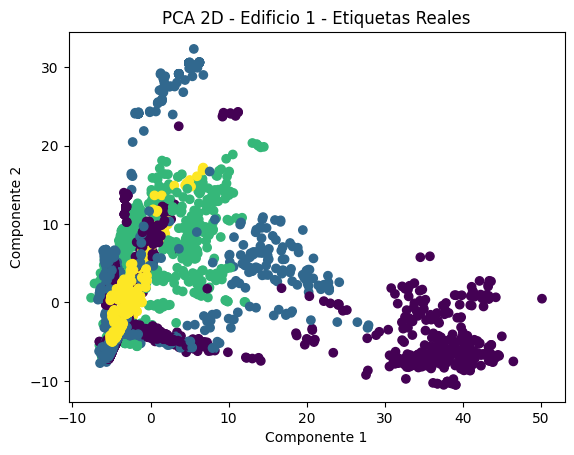

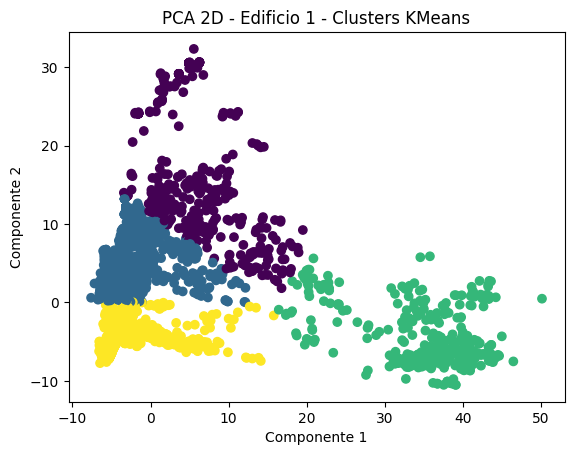

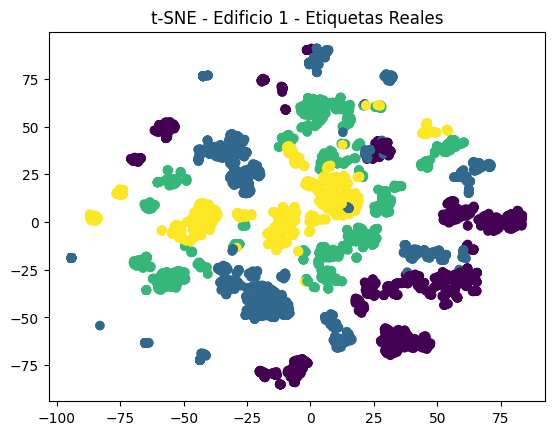

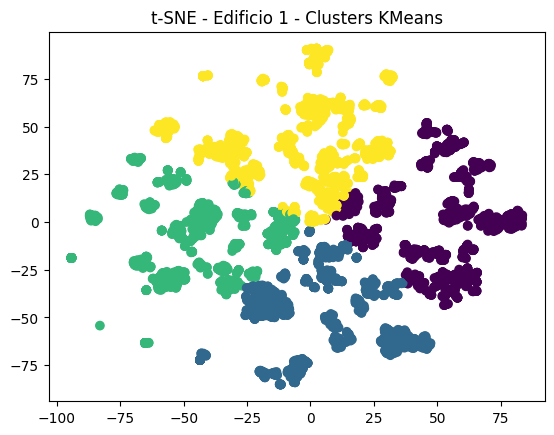

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


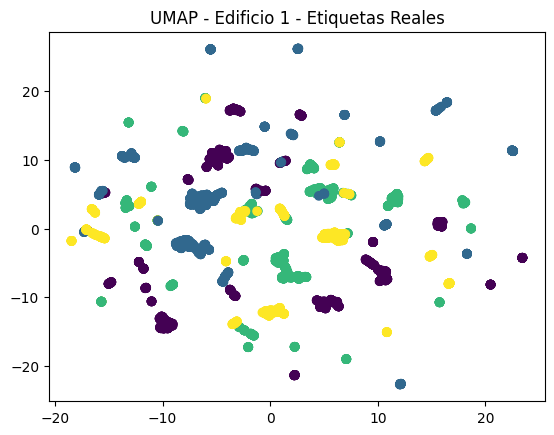

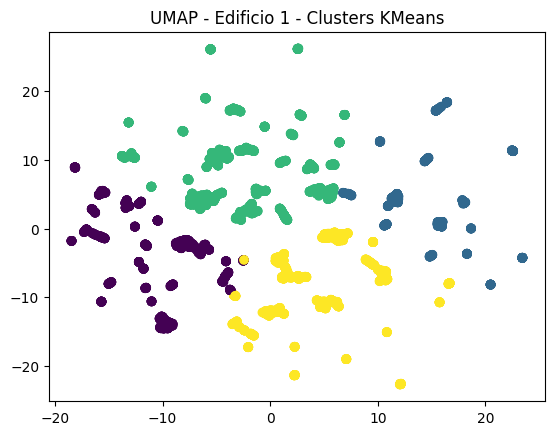


===== EDIFICIO 0 =====


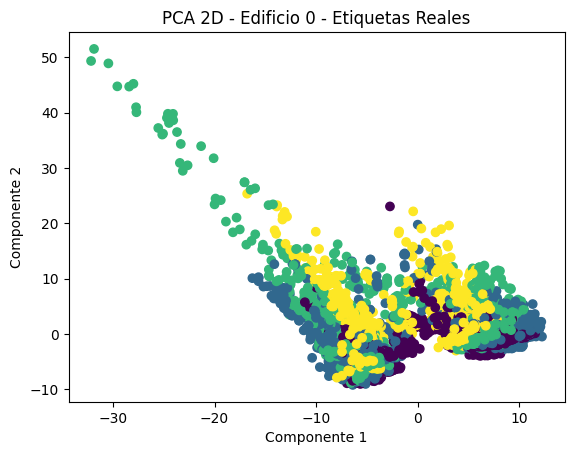

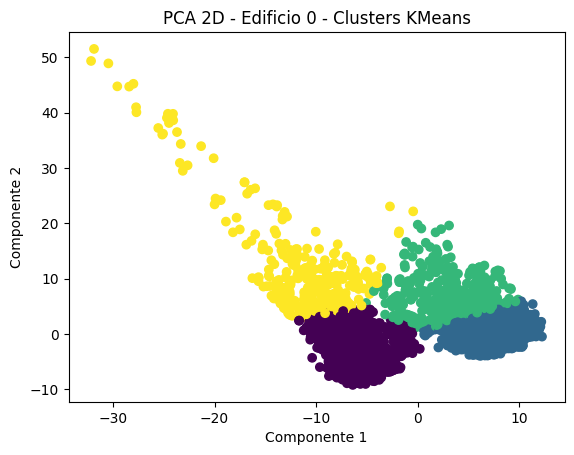

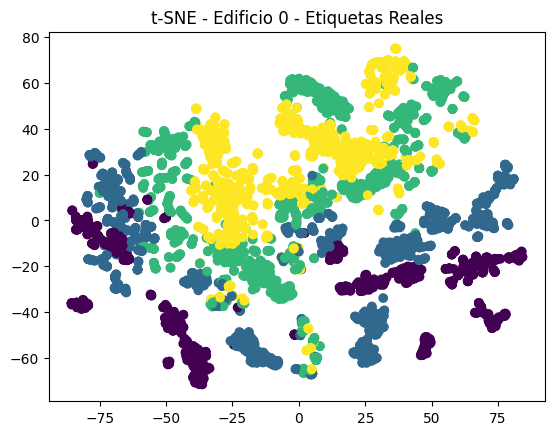

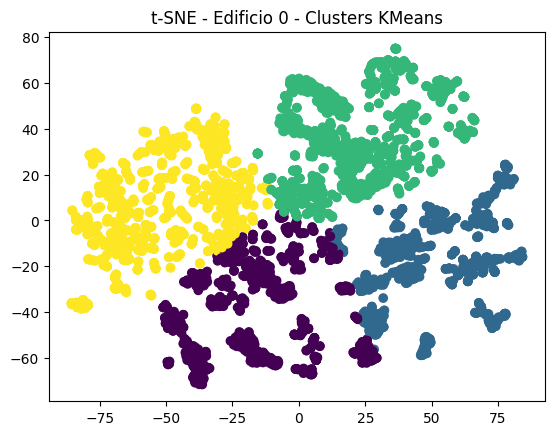

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


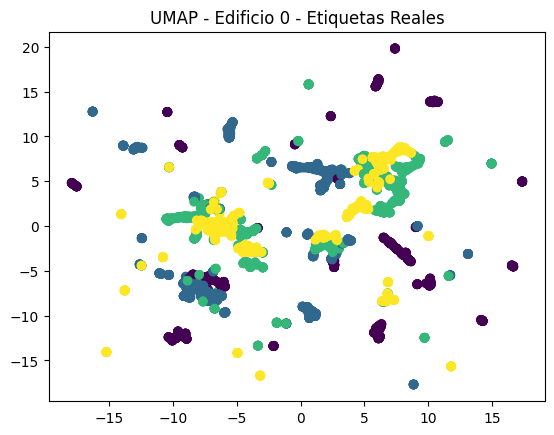

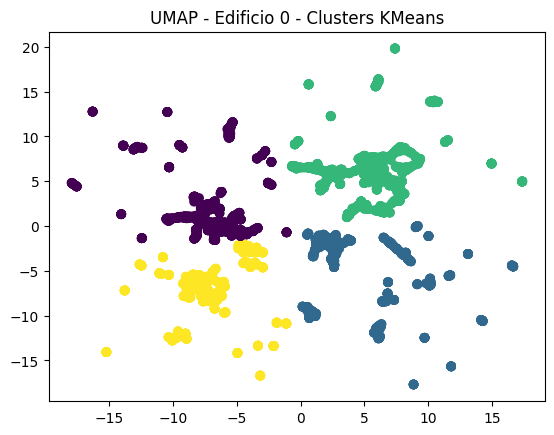


===== EDIFICIO 2 =====


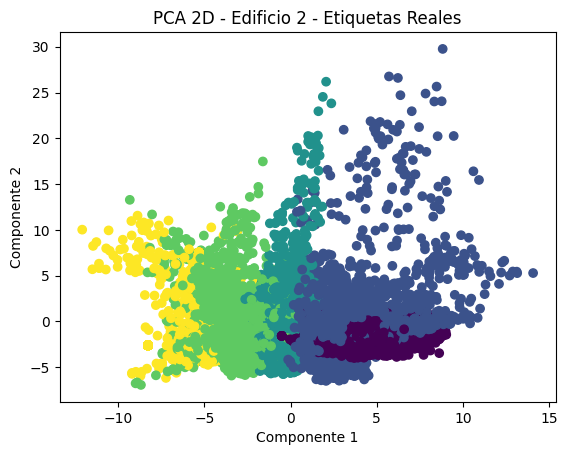

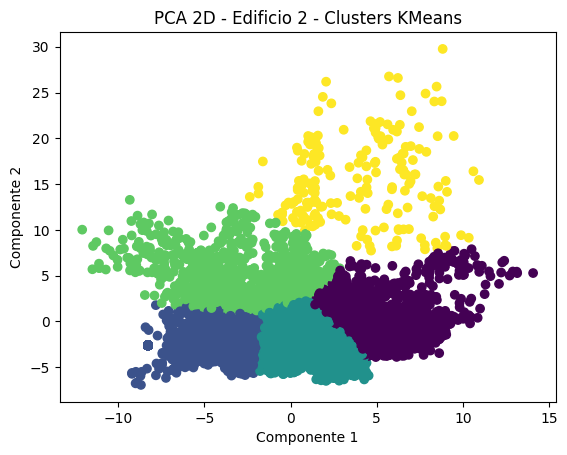

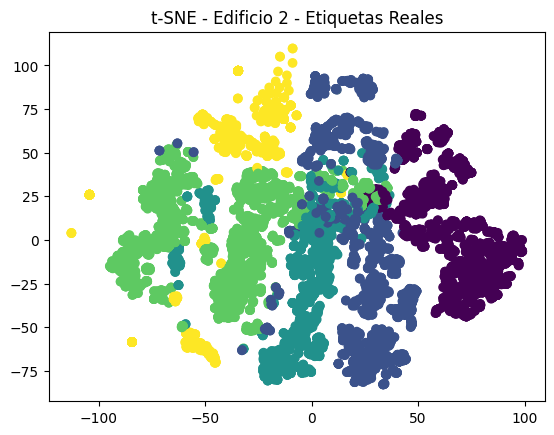

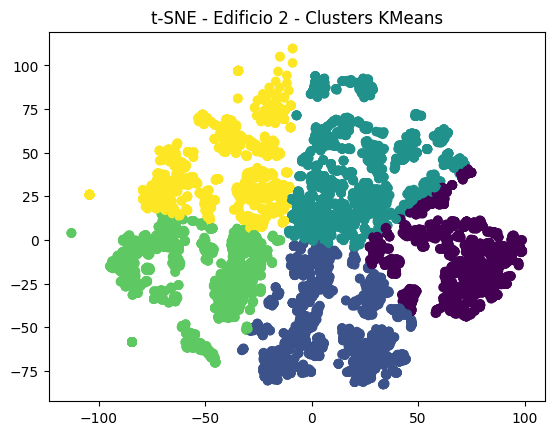

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


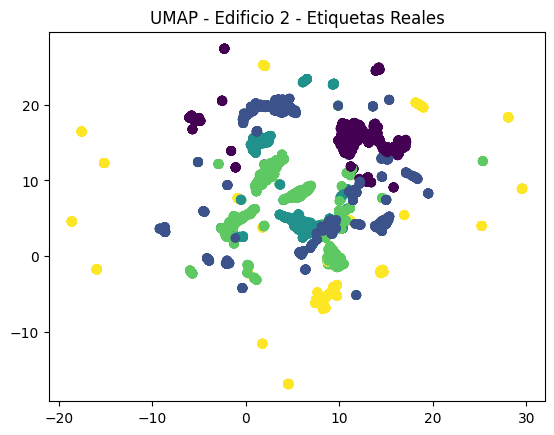

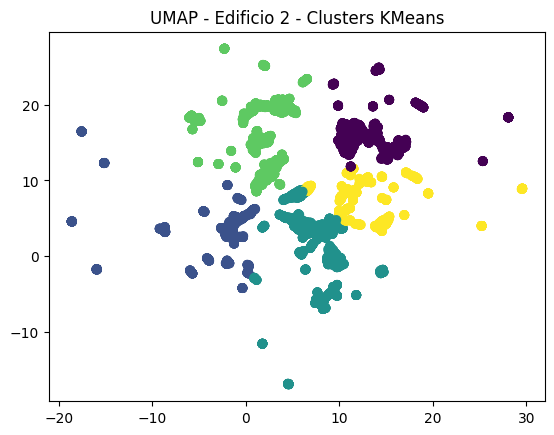

In [31]:
#Gráficas de clasificación
for b in df_final['BUILDINGID'].unique():

    subset = df_final[df_final['BUILDINGID'] == b]
    labels_floor = subset['FLOOR']
    datos_subset = waps_scaled[subset.index]

    print(f"\n===== EDIFICIO {b} =====")

    # PCA 2D (2 componentes)
    pca_2d = PCA(n_components=2)
    datos_pca_2d = pca_2d.fit_transform(datos_subset)

    kmeans = KMeans(n_clusters=len(np.unique(labels_floor)), random_state=42)
    labels_pred = kmeans.fit_predict(datos_pca_2d)

    # Scatter real
    plt.figure()
    plt.scatter(datos_pca_2d[:, 0], datos_pca_2d[:, 1], c=labels_floor)
    plt.title(f"PCA 2D - Edificio {b} - Etiquetas Reales")
    plt.xlabel("Componente 1")
    plt.ylabel("Componente 2")
    plt.show()

    # Scatter clusters
    plt.figure()
    plt.scatter(datos_pca_2d[:, 0], datos_pca_2d[:, 1], c=labels_pred)
    plt.title(f"PCA 2D - Edificio {b} - Clusters KMeans")
    plt.xlabel("Componente 1")
    plt.ylabel("Componente 2")
    plt.show()

    # t-SNE 2D (2 componentes para la gráfica)
    tsne = TSNE(n_components=2, random_state=42)
    datos_tsne = tsne.fit_transform(datos_subset)

    labels_pred_tsne = KMeans(
        n_clusters=len(np.unique(labels_floor)),
        random_state=42
    ).fit_predict(datos_tsne)

    plt.figure()
    plt.scatter(datos_tsne[:, 0], datos_tsne[:, 1], c=labels_floor)
    plt.title(f"t-SNE - Edificio {b} - Etiquetas Reales")
    plt.show()

    plt.figure()
    plt.scatter(datos_tsne[:, 0], datos_tsne[:, 1], c=labels_pred_tsne)
    plt.title(f"t-SNE - Edificio {b} - Clusters KMeans")
    plt.show()


    # UMAP 2D con dos componentes
    reducer = umap.UMAP(n_components=2, random_state=42)
    datos_umap = reducer.fit_transform(datos_subset)

    labels_pred_umap = KMeans(
        n_clusters=len(np.unique(labels_floor)),
        random_state=42
    ).fit_predict(datos_umap)

    plt.figure()
    plt.scatter(datos_umap[:, 0], datos_umap[:, 1], c=labels_floor)
    plt.title(f"UMAP - Edificio {b} - Etiquetas Reales")
    plt.show()

    plt.figure()
    plt.scatter(datos_umap[:, 0], datos_umap[:, 1], c=labels_pred_umap)
    plt.title(f"UMAP - Edificio {b} - Clusters KMeans")
    plt.show()


In [32]:
#Clasificación de pisos por edificio

tabla_resultados = []

for b in df_final['BUILDINGID'].unique():

    subset = df_final[df_final['BUILDINGID'] == b]
    labels_floor = subset['FLOOR']
    datos_subset = waps_scaled[subset.index]

    metodos = {
        "Sin_Reduccion": datos_subset,
        "PCA_20": PCA(n_components=20).fit_transform(datos_subset),
        "TSNE_2": TSNE(n_components=2, random_state=42).fit_transform(datos_subset),
        "UMAP_10": umap.UMAP(n_components=10, random_state=42).fit_transform(datos_subset)
    }

    for nombre, datos_transformados in metodos.items():

        metricas = obtener_metricas(datos_transformados, labels_floor)

        tabla_resultados.append({
            "Edificio": b,
            "Metodo": nombre,
            **metricas
        })

# Tabla de resultados
df_resultados = pd.DataFrame(tabla_resultados)
#Visualización de la table
df_resultados = df_resultados.round(3)
#Ordenar por edificio y mejor métrica
df_resultados = df_resultados.sort_values(
    by=["Edificio", "V-Measure"],
    ascending=[True, False]
)
print(df_resultados)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


    Edificio         Metodo  Rand Index  Homogeneity  Completeness  V-Measure  \
6          0         TSNE_2       0.690        0.248         0.249      0.249   
7          0        UMAP_10       0.634        0.193         0.212      0.202   
5          0         PCA_20       0.538        0.006         0.009      0.007   
4          0  Sin_Reduccion       0.536        0.005         0.007      0.006   
2          1         TSNE_2       0.652        0.118         0.117      0.118   
1          1         PCA_20       0.507        0.079         0.113      0.093   
0          1  Sin_Reduccion       0.515        0.079         0.109      0.091   
3          1        UMAP_10       0.616        0.067         0.074      0.070   
11         2        UMAP_10       0.724        0.434         0.521      0.474   
10         2         TSNE_2       0.779        0.460         0.451      0.455   
9          2         PCA_20       0.739        0.354         0.386      0.369   
8          2  Sin_Reduccion 